## Mobile Price Range and Category Classification System
or
## Mobile Price Range and Category Classification System with Brand Prediction.

### STEP-1:OBJECTIVE
    -Build a classification model that predicts the price range and classifies mobile phones into different price categories based on their features (e.g., RAM, battery power, internal storage, camera quality, etc.).

Challenges:

Imbalanced class distribution.
Feature selection and engineering.
Model accuracy and generalization.

In [276]:
# Installing catboost library
# !pip3 install catboost

In [277]:
# IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
# from catboost import catBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# FOR LOOP AND TIME
from tqdm import tqdm
from time import time


### STEP-2 :  DATA COLLECTION AND ANALYSIS

In [278]:
#LOAD THE DATASET AND DISPALY
path="https://raw.githubusercontent.com/SayanDasDev/mobile_price_prediction/refs/heads/main/data/data_mobile_price_range.csv"
data_frame=pd.read_csv(path)
data_frame.head(10) #first view

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [279]:
# DIMENSION OF THE DATASET
data_frame.shape

(2000, 21)

In [280]:
# DATASETS VARIABLE OR FEATURES
data_frame.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### STEP-3:EXPLORATORY DATA ANALYSIS(EDA)

In [281]:
# SUMMERIZE THE DATA AND THE STATSTICS
print("DATASET INFORMATION...")
print("\n")
data_frame.info()
print("\n")
print("BASIC STATSTICS OF THE DATASET:")
print("\n")
data_frame.describe()

DATASET INFORMATION...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-nul

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [282]:
# CHECK FOR MISSING VALUE
data_frame.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

##### HERE ALL COLUMNS GIVES THE VALUE '0' THAT MEANS THERE IS NO MISSING VALUE

In [283]:
# CHECKING FOR DUPLICATE VALUE
data_frame.duplicated().sum()

np.int64(0)

In [284]:
# CHECKING FOR UNIQUE VALUES OF EACH COLUMN
data_frame.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [285]:
# EXPLORING DATA
features_list = data_frame.columns.tolist() 
print("UNIQUE VALUES CORRESPONDING TO EACH COLUMN:  \n")
for feature in tqdm(features_list):
    print(f"UNIQUE VALUE IN {feature}:")
    print(data_frame[feature].unique())
    print("\n")



UNIQUE VALUES CORRESPONDING TO EACH COLUMN:  



100%|██████████| 21/21 [00:00<00:00, 2997.77it/s]

UNIQUE VALUE IN battery_power:
[ 842 1021  563 ... 1139 1467  858]


UNIQUE VALUE IN blue:
[0 1]


UNIQUE VALUE IN clock_speed:
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]


UNIQUE VALUE IN dual_sim:
[0 1]


UNIQUE VALUE IN fc:
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]


UNIQUE VALUE IN four_g:
[0 1]


UNIQUE VALUE IN int_memory:
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]


UNIQUE VALUE IN m_dep:
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]


UNIQUE VALUE IN mobile_wt:
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89

In [286]:
# CHECKING CLASS DISTRIBUTION
data_frame['price_range'].value_counts()


price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

Text(0, 0.5, 'count')

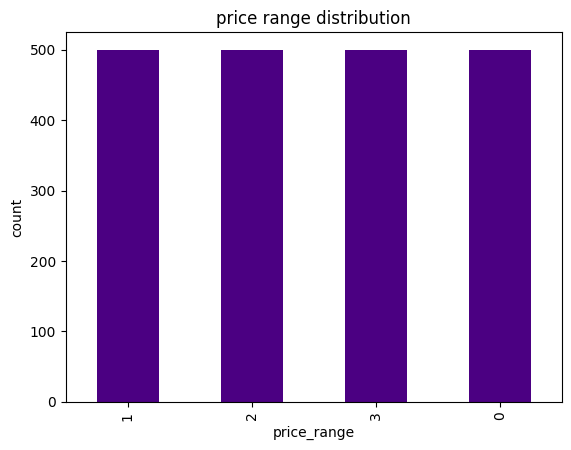

In [287]:
# VISUALIZE THE CLASS DISTRIBUTION
data_frame['price_range'].value_counts().plot(kind='bar',title="price range distribution",color='indigo')
plt.xlabel('price_range')
plt.ylabel('count')

In [288]:
# PAIRPLOTS 
# sns.pairplot(data_frame,hue='price_range')
# plt.show()

100%|██████████| 21/21 [00:01<00:00, 18.92it/s]


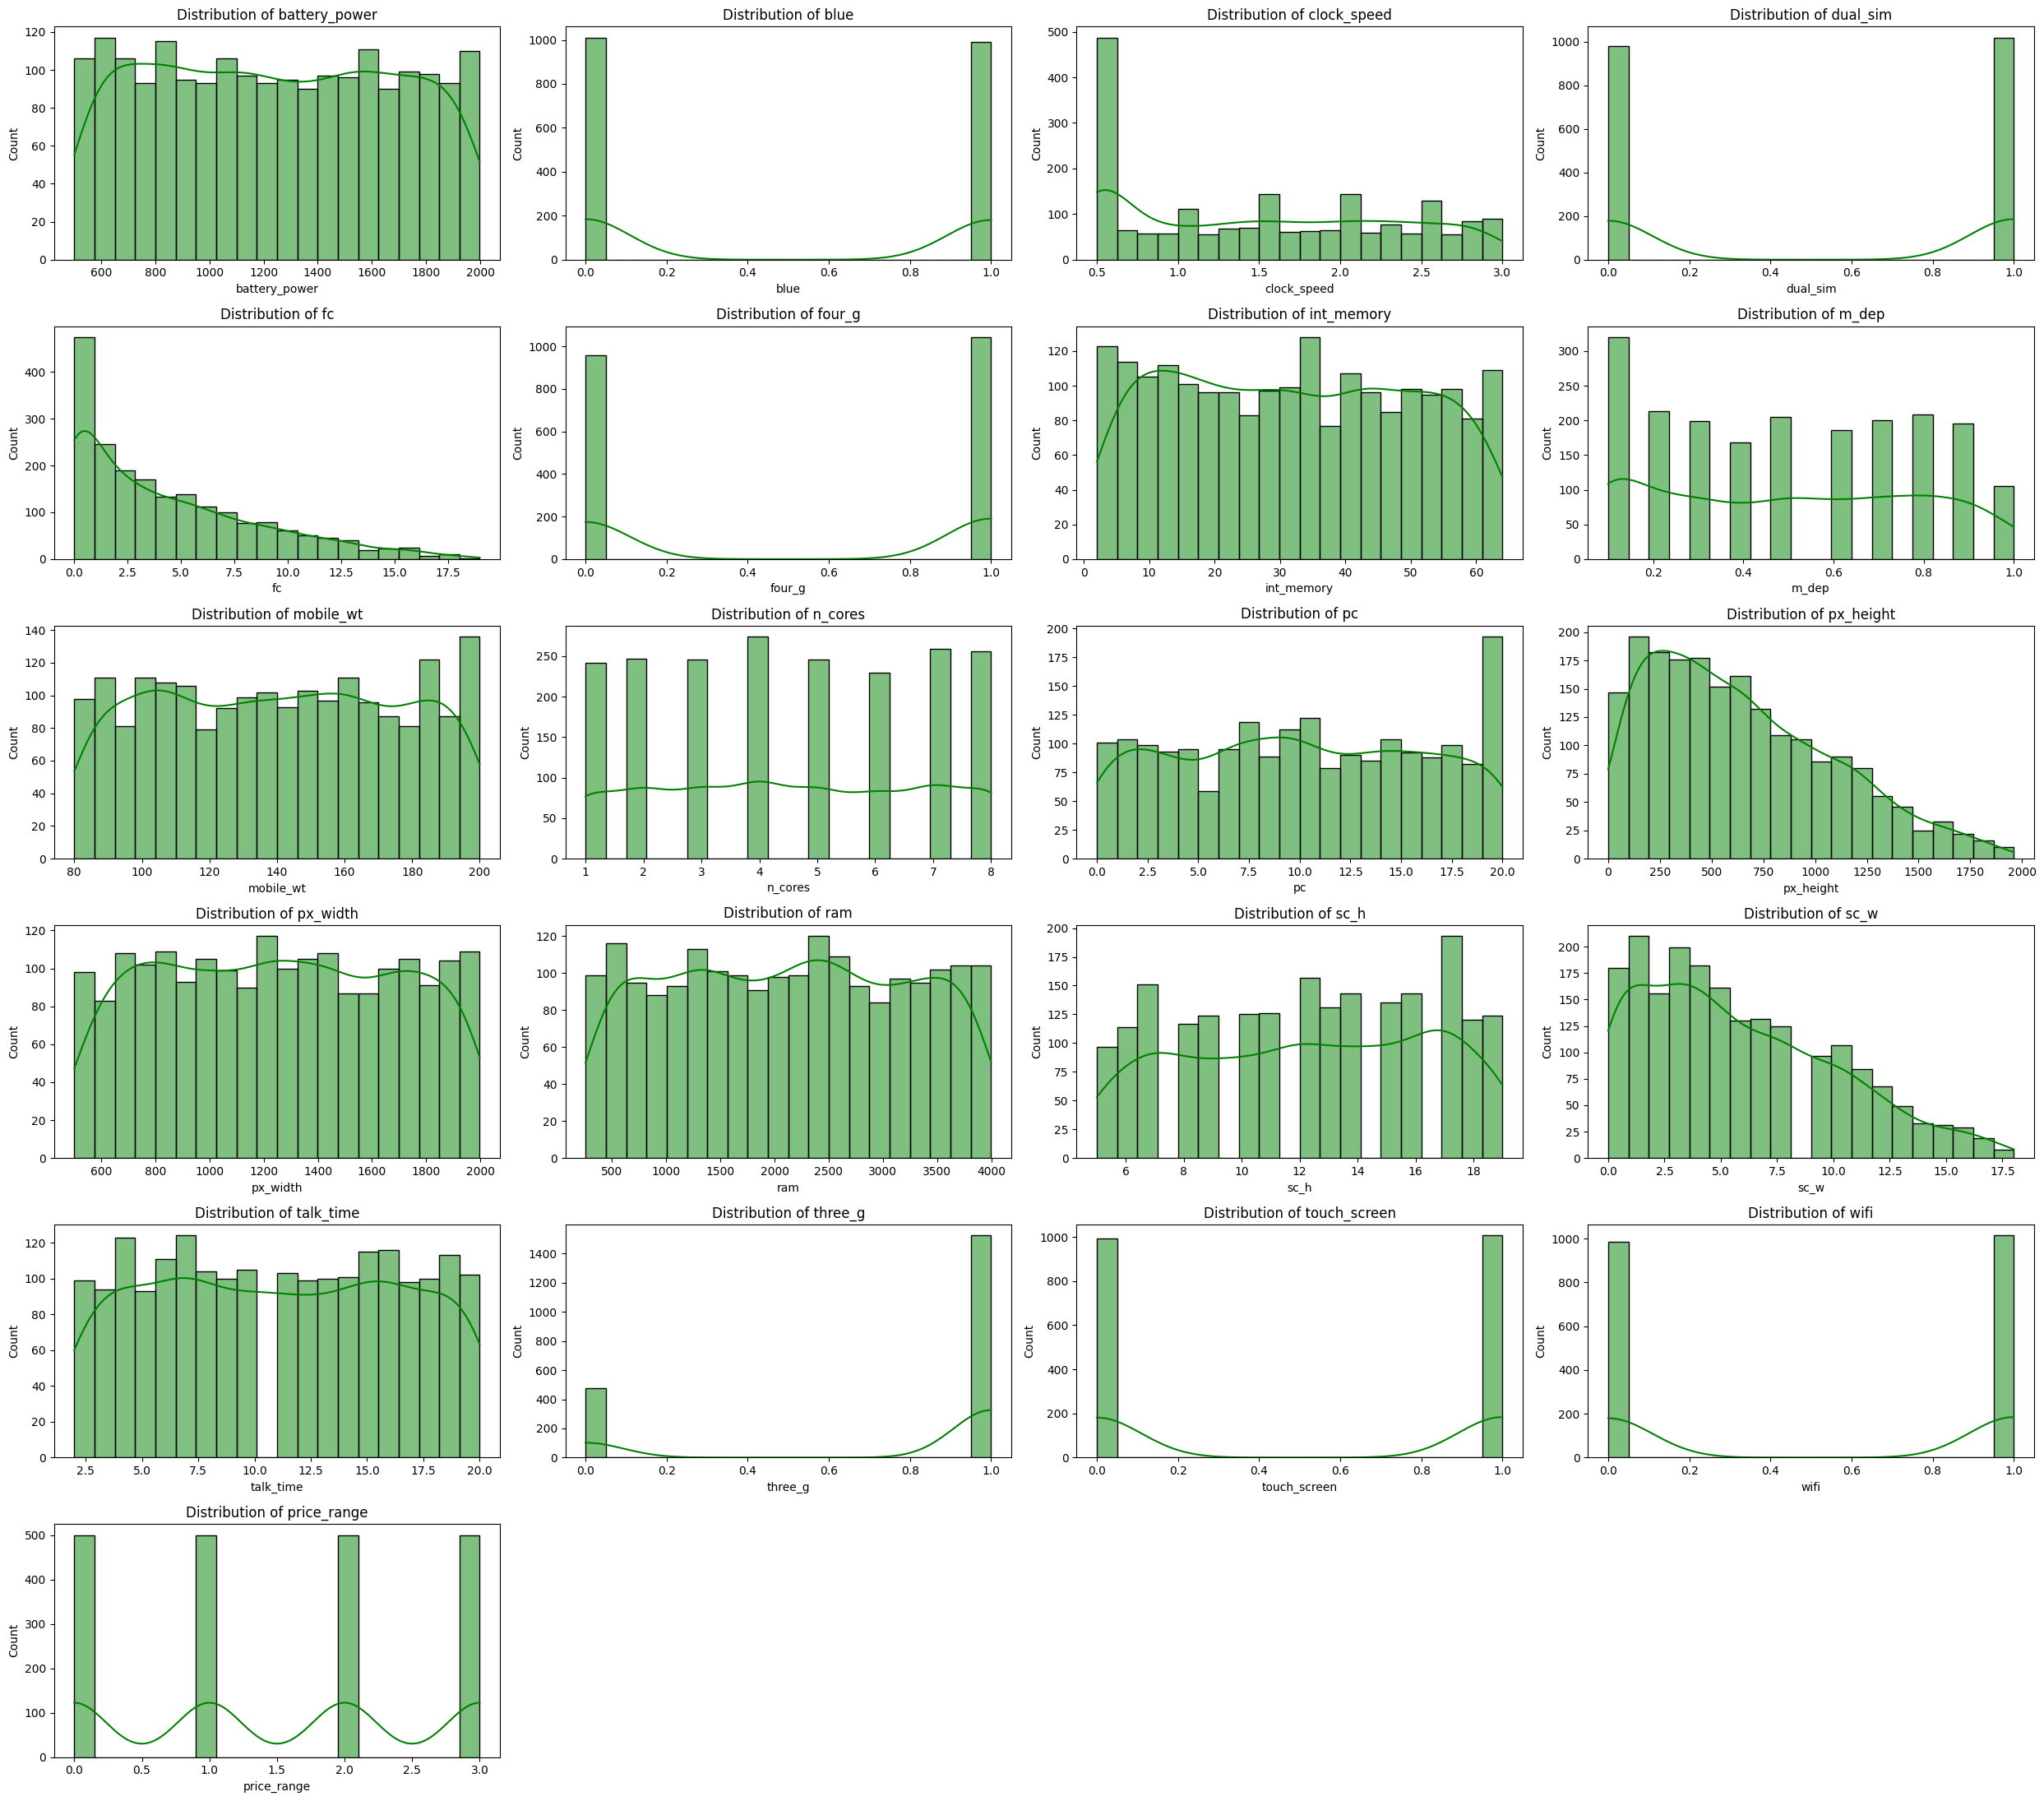

In [289]:
# EXPLORING INDIVIDUAL FEATURES DISTRIBUTION by HISTOGRAM
row = 6
col = 4
plt.figure(figsize=(25,22))
count = 1
for feature in tqdm(features_list):
    plt.subplot(row, col, count) 
    sns.histplot(data_frame[feature], bins=20, kde=True,color='g')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Count')
    count += 1

# Adjust the layout so it fits well
plt.tight_layout()
plt.show()



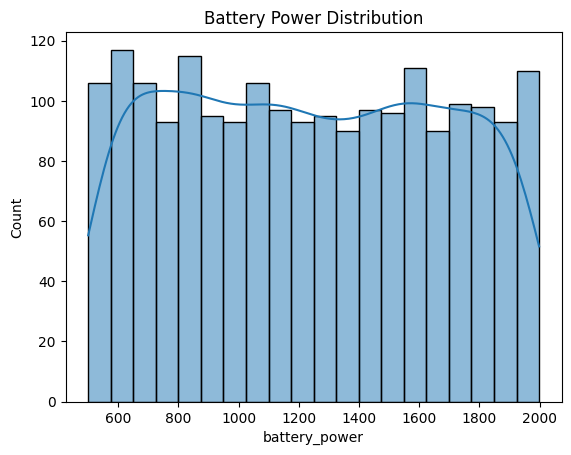

In [290]:
# Visualize distributions
sns.histplot(data_frame['battery_power'], bins=20, kde=True)
plt.title("Battery Power Distribution")
plt.show()

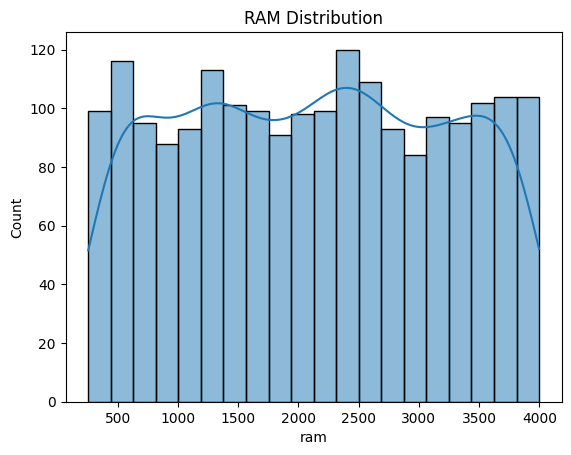

In [291]:
# Visualize distributions
sns.histplot(data_frame['ram'], bins=20, kde=True)
plt.title("RAM Distribution")
plt.show()

C:\Users\raiha\AppData\Local\Temp\ipykernel_22236\189992471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_frame, x='four_g', palette='Set2')


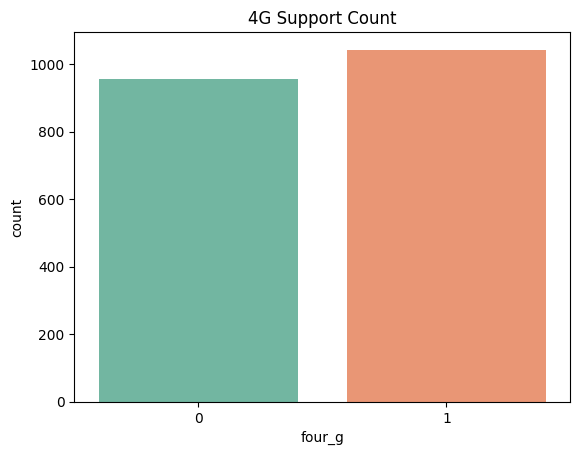

In [292]:
#CATEGORICAL FEATURES

# 4G Support Count
sns.countplot(data=data_frame, x='four_g', palette='Set2')
plt.title('4G Support Count')
plt.show()

In [293]:
# EXPLORING INDIVIDUAL FEATURES DISTRIBUTION by HISTOGRAM
# row = 6
# col = 4
# plt.figure(figsize=(25,22))
# count = 1
# for feature in tqdm(features_list):
#     plt.subplot(row, col, count) 
#     sns.countplot(data_frame,x=feature, palette='Set2')
#     plt.title(f"Distribution of {feature}")
#     plt.xlabel(feature)
#     plt.ylabel('Count')
#     count += 1

# # Adjust the layout so it fits well
# plt.tight_layout()
# plt.show()



C:\Users\raiha\AppData\Local\Temp\ipykernel_22236\4071154533.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_frame, x='price_range', palette='Set2')


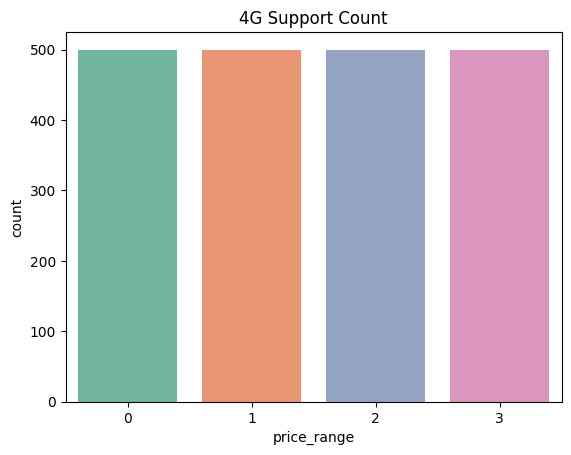

In [294]:
#CATEGORICAL FEATURES

# brand Count
sns.countplot(data=data_frame, x='price_range', palette='Set2')
plt.title('4G Support Count')
plt.show()

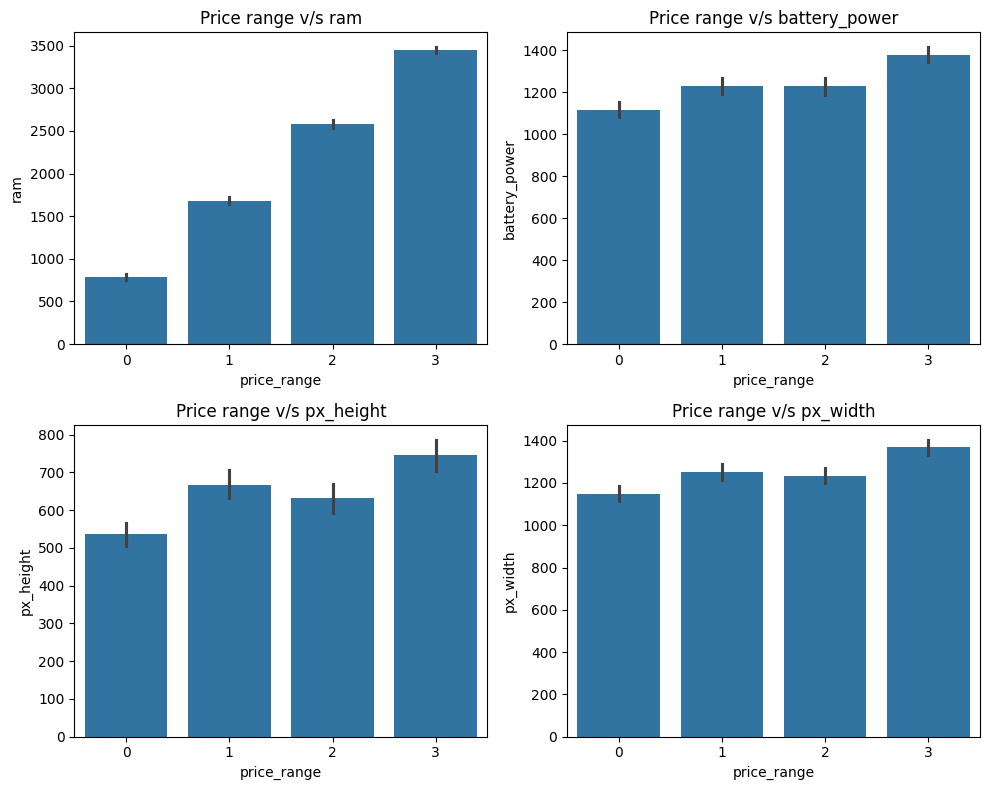

In [295]:
# plotting  price_range vs some other fearures
plt.figure(figsize=(10,8))

variables=['ram','battery_power','px_height','px_width']
counter=1
for var in variables:
  plt.subplot(2,2,counter)
  sns.barplot(x=data_frame['price_range'],y=data_frame[var])
  plt.title(f'Price range v/s {var}')
  counter+=1
  plt.tight_layout()

In [296]:
desc_stats = data_frame['ram'].describe()
desc_stats

count    2000.000000
mean     2124.213000
std      1084.732044
min       256.000000
25%      1207.500000
50%      2146.500000
75%      3064.500000
max      3998.000000
Name: ram, dtype: float64

In [297]:
# BOX PLOT VALUES

100%|██████████| 21/21 [00:00<00:00, 31.93it/s]


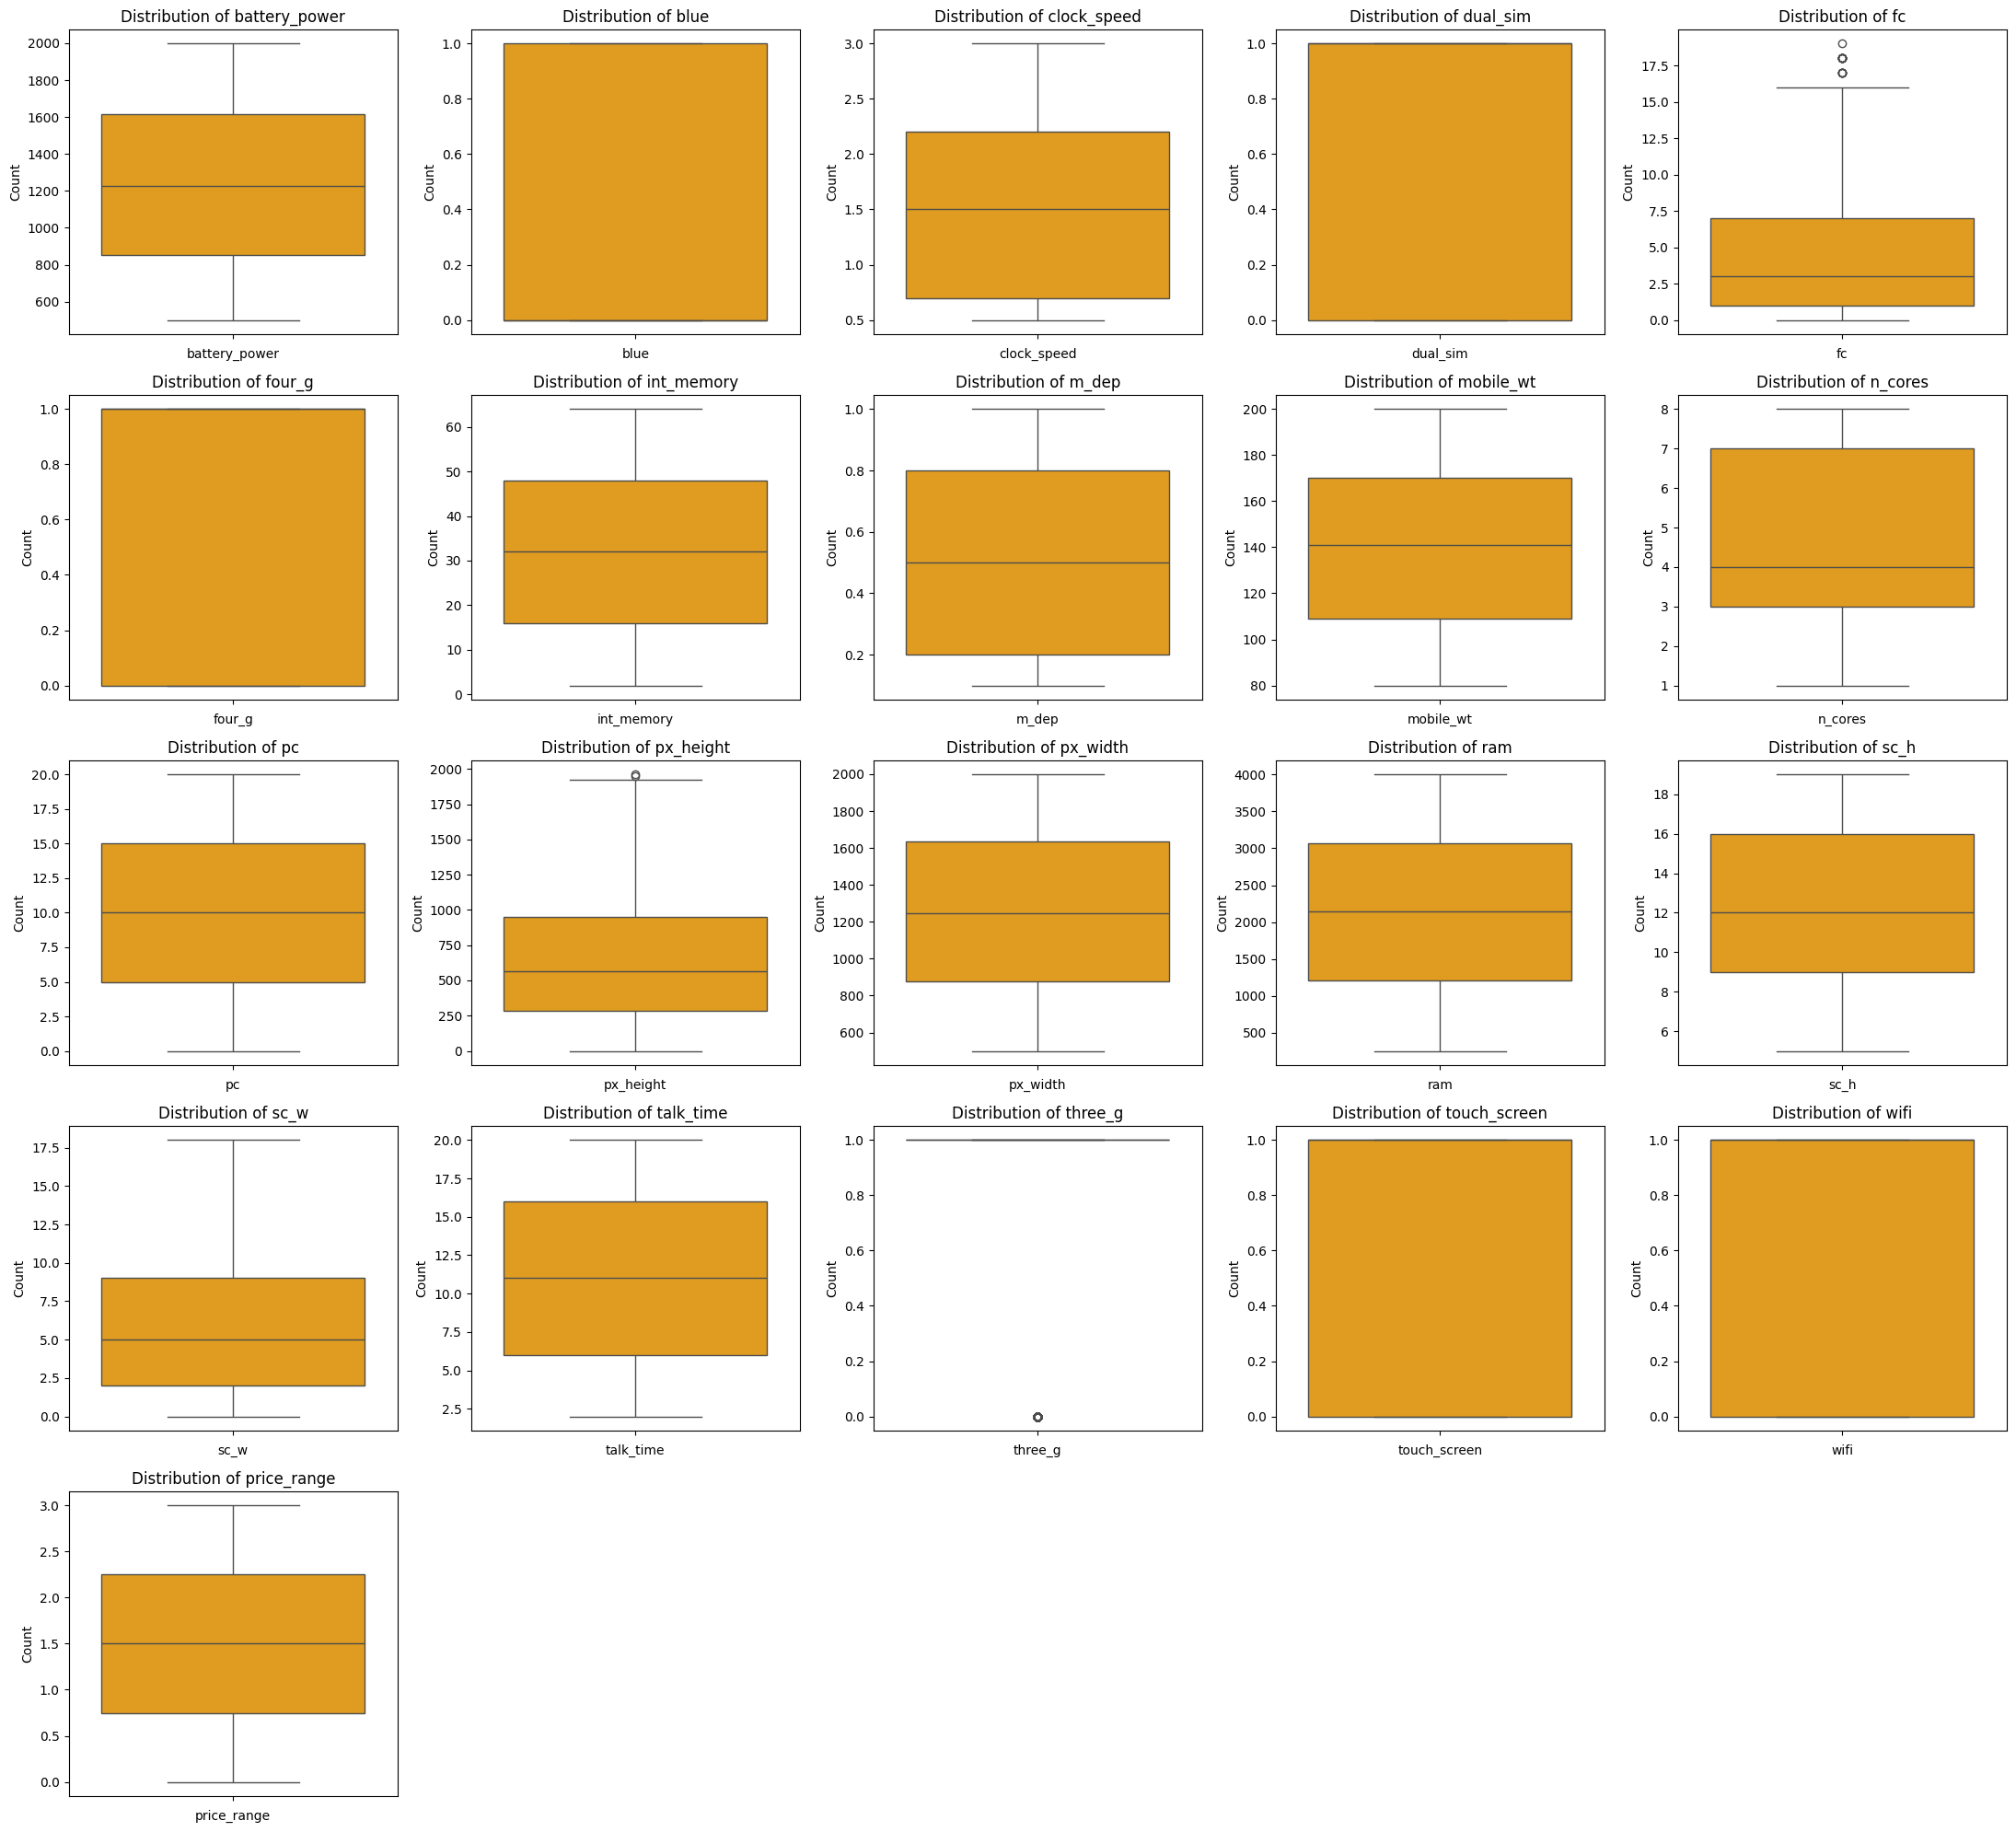

In [298]:
# BOXPLOT VISUALIZATION
row = 5
col = 5
plt.figure(figsize=(22,20))
count = 1
for feature in tqdm(features_list):
    plt.subplot(row, col, count) 
    sns.boxplot(data_frame[feature],color='orange')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Count')
    count += 1

# Adjust the layout so it fits well
plt.tight_layout()
plt.show()


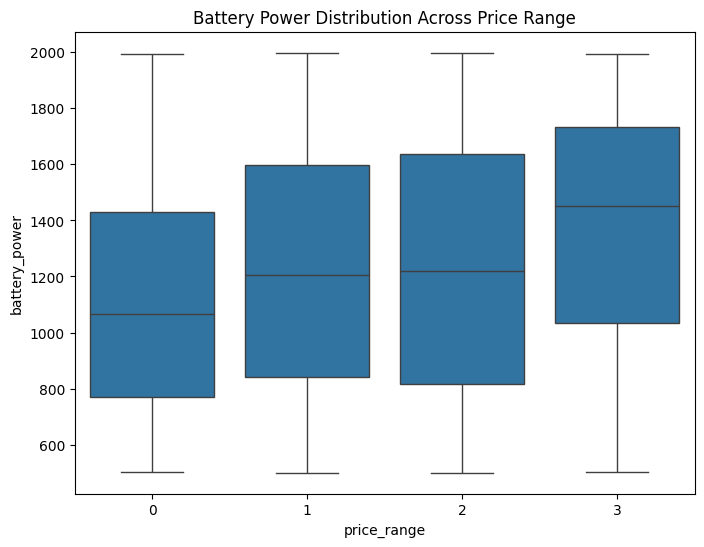

In [299]:
# SEPERATE BOX PLOT
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_frame, x='price_range', y='battery_power')
plt.title("Battery Power Distribution Across Price Range")
plt.show()

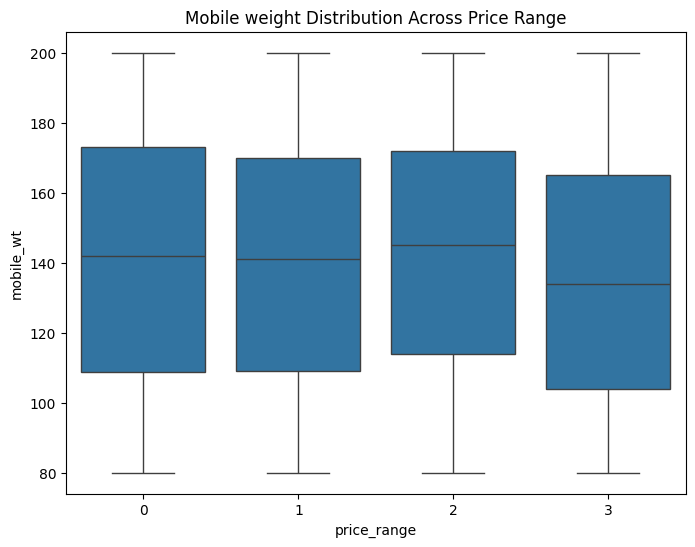

In [300]:
# SEPERATE BOX PLOT
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_frame, x='price_range', y='mobile_wt')
plt.title("Mobile weight Distribution Across Price Range")
plt.show()

In [301]:
# DIFINE CATEGORICAL AND NUMERICAL FEATURE
numerical_columns =[ feature for feature in data_frame.columns if data_frame[feature].dtype !='O']
categorical_columns =[ feature for feature in data_frame.columns if data_frame[feature].dtype =='O']
print('WE HAVE {} NUMERICAL FEATURES :{}'.format(len(numerical_columns),numerical_columns))
print('WE HAVE {} CATEGORICAL FEATURES :{}'.format(len(categorical_columns),categorical_columns))

WE HAVE 21 NUMERICAL FEATURES :['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
WE HAVE 0 CATEGORICAL FEATURES :[]


In [302]:
# CORRELATION TABLE
data_frame[numerical_columns].corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


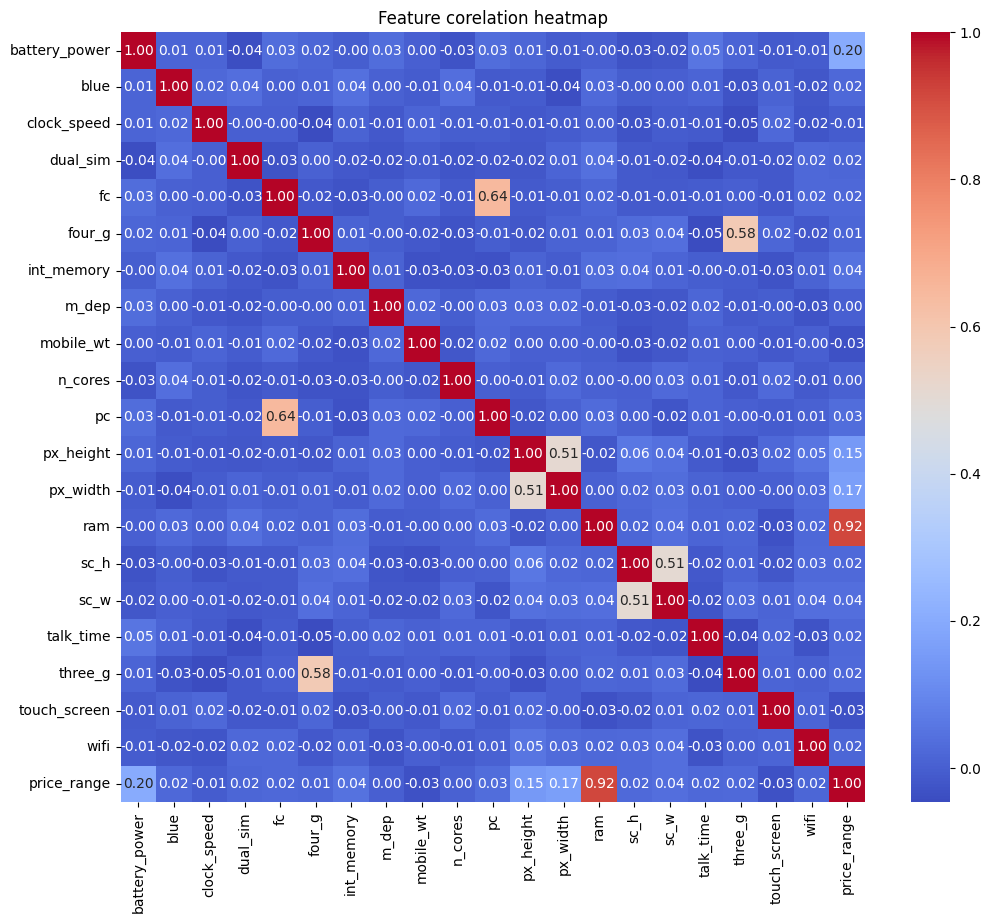

In [303]:
# VISUALIZING RELATIONSHIP(CORRELATION HEATMAP)TO FIND FEATURES STRONGLY RELATED TO price_range
plt.figure(figsize=(12,10))
sns.heatmap(data_frame[numerical_columns].corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Feature corelation heatmap')
plt.show()

### STEP-4:DATA PREPROCESSING


In [304]:
# CHECK FOR MSSING VALUE
missing_values = data_frame.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


##### NO MISSING VALUE SO WE DONT NEED TO HANDLE MISSING VALUE

### STEP-5:FEATURE ENGINEERING

In [305]:
# ADD NEW FEATURE
data_frame['px_area'] = data_frame['px_height'] * data_frame['px_width']
data_frame['screen_area'] = data_frame['sc_h'] * data_frame['sc_w']
data_frame['battery_performance'] = data_frame['battery_power'] / data_frame['mobile_wt']
data_frame=data_frame.drop(['px_height','px_width','sc_h','sc_w'],axis=1)
data_frame.head() #THE NEW DATASET



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,px_area,screen_area,battery_performance
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,1,15120,63,4.478723
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,2,1799140,51,7.507353
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2,2167308,22,3.882759
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2,2171776,128,4.694656
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1,1464096,16,12.914894


In [306]:

def categorize_phone(row):
    if row['ram'] > 0.5 and row['clock_speed'] > 0.5:
        return 'Performance-based'
    elif row['battery_power'] > 0.5:
        return 'Battery-based'
    else:
        return 'General'

# Apply function to create 'category'
data_frame['category'] = data_frame.apply(categorize_phone, axis=1)
data_frame.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,talk_time,three_g,touch_screen,wifi,price_range,px_area,screen_area,battery_performance,category
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,19,0,0,1,1,15120,63,4.478723,Performance-based
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,7,1,1,0,2,1799140,51,7.507353,Battery-based
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,9,1,1,0,2,2167308,22,3.882759,Battery-based
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,11,1,0,0,2,2171776,128,4.694656,Performance-based
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,15,1,1,0,1,1464096,16,12.914894,Performance-based


### STEP-6:ENCODING CATEGORICAL VARIABLES

In [307]:
# Encode categorical variables
label_enc=LabelEncoder()
data_frame['category'] = label_enc.fit_transform(data_frame['category'])
data_frame[['category']]

,category
0,1
1,0
2,0
3,1
4,1
...,...
1995,0
1996,1
1997,1
1998,1


In [308]:
data_frame.category.nunique()

2

### STEP-7:FEATURE SELECTION

In [309]:
#Finding P and F-values of all the avaliable variables
from sklearn.feature_selection import SelectKBest,f_classif
df_copy = data_frame.copy()
y=df_copy.pop('price_range')
X = df_copy
#for selecting 5 best features from dataset
feature_selector = SelectKBest(f_classif,k=10) 
fit=feature_selector.fit(X,y)

In [310]:

# Perform Statistical Test to obtain P-Value

#Storing results in dataframe 
p_values=pd.DataFrame(fit.pvalues_)
f_score=pd.DataFrame(fit.scores_)
input_variable_names=pd.DataFrame(X.columns)

#Concating two dataframe
summary_stats=pd.concat([input_variable_names,p_values,f_score],axis=1)
summary_stats.columns=['input_variable','p_value','f_score']

#Selecting values based on 90% confidence interval.
selected_variable=summary_stats.loc[(summary_stats['p_value']<=0.1)]
selected_variable.sort_values(by='f_score',ascending = True,inplace=True)
selected_variable

C:\Users\raiha\AppData\Local\Temp\ipykernel_22236\3651943364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variable.sort_values(by='f_score',ascending = True,inplace=True)


,input_variable,p_value,f_score
17,screen_area,8.845839e-02,2.179929
9,n_cores,4.893585e-02,2.625415
6,int_memory,3.277694e-02,2.922996
8,mobile_wt,1.311739e-02,3.594318
16,px_area,1.683290e-16,26.006797
18,battery_performance,6.907550e-17,26.631816
0,battery_power,5.948688e-20,31.598158
11,ram,0.000000e+00,3520.110824


In [311]:
# Get the selected input variable names
selected_columns = selected_variable['input_variable'].values
# Display the corresponding columns from the original dataset
data_frame[selected_columns]

,screen_area,n_cores,int_memory,mobile_wt,px_area,battery_performance,battery_power,ram
0,63,2,7,188,15120,4.478723,842,2549
1,51,3,53,136,1799140,7.507353,1021,2631
2,22,5,41,145,2167308,3.882759,563,2603
3,128,6,10,131,2171776,4.694656,615,2769
4,16,2,44,141,1464096,12.914894,1821,1411
...,...,...,...,...,...,...,...,...
1995,52,6,2,106,2309580,7.490566,794,668
1996,110,4,39,187,1797975,10.508021,1965,2032
1997,9,8,36,108,1416576,17.694444,1911,3057
1998,180,5,46,145,225120,10.427586,1512,869


### STEP-8:DATA TRANSFORMATION

In [312]:
X=data_frame[selected_columns]
y=data_frame['price_range']


100%|██████████| 8/8 [00:00<00:00,  8.69it/s]


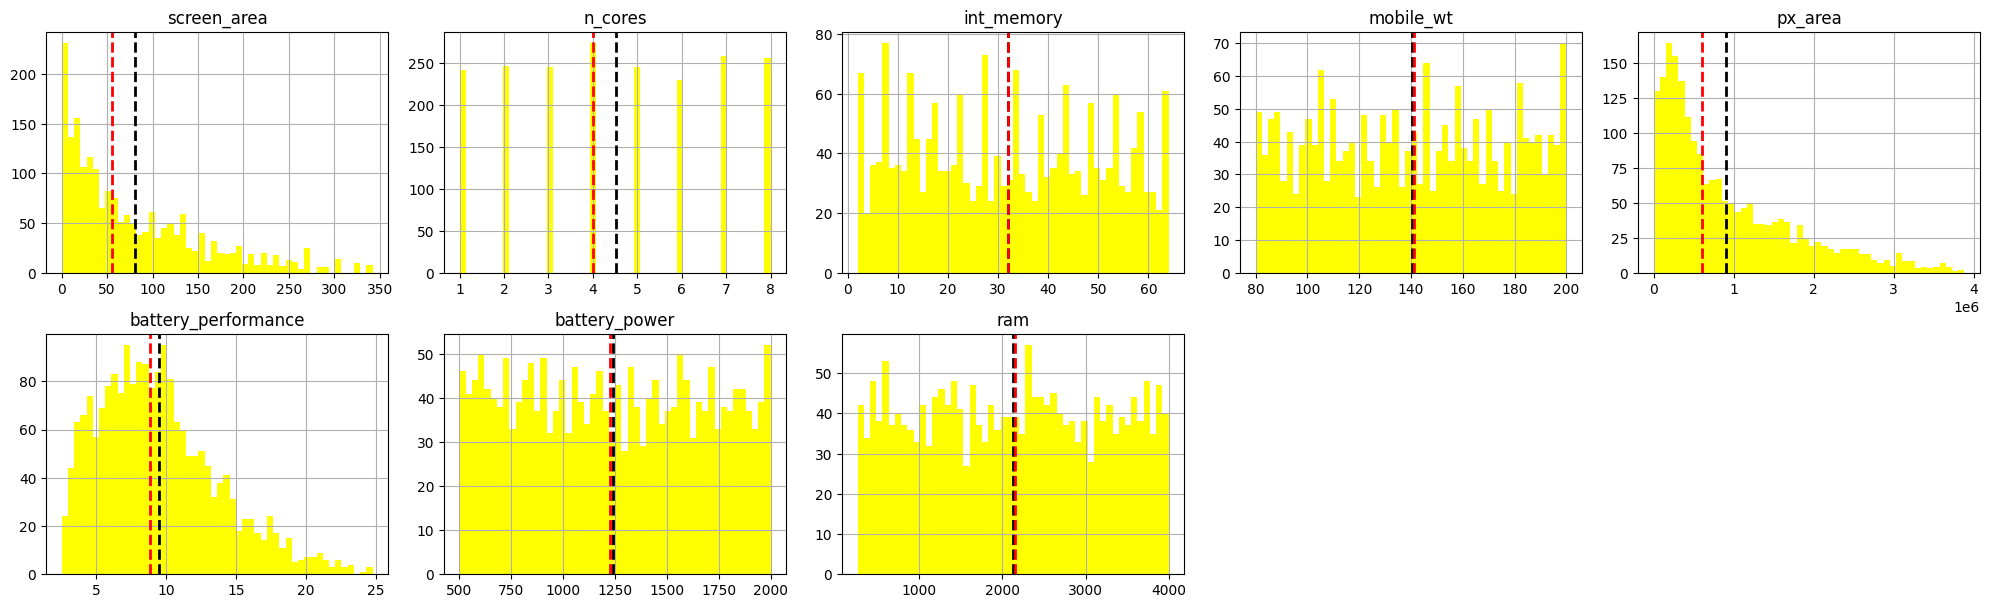

In [313]:
counter=1
fig = plt.figure(figsize=(20,15))
for col in tqdm(X.columns): 
  plt.subplot(5,5,counter)
  ax = fig.gca()
  X[col].hist(bins=50, ax = ax,color='yellow') 
  ax.axvline(X[col].mean(), color = 'black',linestyle='dashed', linewidth=2) 
  ax.axvline(X[col].median(), color = 'red',linestyle='dashed', linewidth=2) 
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

##### HERE screen_area AND px_area ARE NOT IN NORMALIZED

In [314]:
# Transform Your data
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(copy=False)
X[['screen_area','px_area']]=pt.fit_transform(X[['screen_area','px_area']])

C:\Users\raiha\AppData\Local\Temp\ipykernel_22236\2305535081.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['screen_area','px_area']]=pt.fit_transform(X[['screen_area','px_area']])


100%|██████████| 2/2 [00:00<00:00, 12.35it/s]


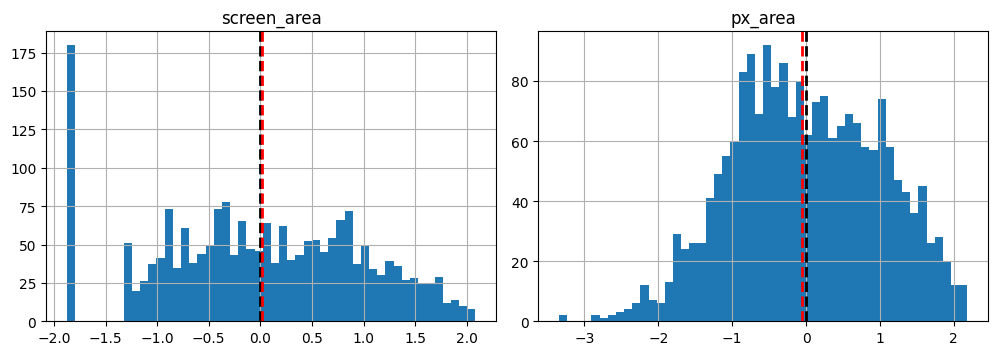

In [315]:
# FOR CHECKING THE COLUMNS ARE NORMALIZED OR NOT
counter=1
fig = plt.figure(figsize=(15,10))
for col in tqdm(['screen_area','px_area']):
  plt.subplot(3,3,counter)
  ax = fig.gca()
  X[col].hist(bins=50, ax = ax) 
  ax.axvline(X[col].mean(), color = 'black',linestyle='dashed', linewidth=2) 
  ax.axvline(X[col].median(), color = 'red',linestyle='dashed', linewidth=2) 
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

### STEP-9:SPLIT THE DATA AND SCALING

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 8)
(400, 8)
(1600,)
(400,)


In [317]:
# Define the pipeline with PowerTransformer and StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler())  # Step 2: Standardize the data
])

# Fit the pipeline on the training data
pipeline.fit(X_train)

# Transform the training and test data
X_train_scaled = pipeline.transform(X_train)
X_test_scaled = pipeline.transform(X_test)

In [318]:
# models = {
#     'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
#     'RandomForest': RandomForestClassifier(random_state=42),
#     'DecisionTree': DecisionTreeClassifier(random_state=42),
#     'SVM': SVC(random_state=42, probability=True),
#     'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
#     # 'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
# }

In [319]:
# # Function to evaluate a model
# def evaluate_model(model, X_train, X_test, y_train, y_test):
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     return {
#         'Accuracy': accuracy_score(y_test, y_pred),
#         'Precision': precision_score(y_test, y_pred, average='weighted'),
#         'Recall': recall_score(y_test, y_pred, average='weighted'),
#         'F1-Score': f1_score(y_test, y_pred, average='weighted')
#     }

# # Store results before hyperparameter tuning
# results_before_tuning = []

# for name, model in models.items():
#     metrics = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
#     metrics['Model'] = name
#     results_before_tuning.append(metrics)

# # Convert results to a DataFrame
# results_df_before = pd.DataFrame(results_before_tuning)

# # Hyperparameter grids for tuning
# param_grids = {
#     'LogisticRegression': {'C': [0.01, 0.1, 1, 10]},
#     'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
#     'DecisionTree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
#     'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
#     'XGBoost': {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]},
#     'CatBoost': {'depth': [4, 6, 8], 'learning_rate': [0.01, 0.1, 0.2]}
# }

# # Store results after hyperparameter tuning
# results_after_tuning = []

# for name, model in models.items():
#     print(f"Performing GridSearchCV for {name}...")
#     grid_search = GridSearchCV(model, param_grids[name], scoring='accuracy', cv=3, n_jobs=-1)
#     grid_search.fit(X_train_scaled, y_train)
#     best_model = grid_search.best_estimator_
#     metrics = evaluate_model(best_model, X_train_scaled, X_test_scaled, y_train, y_test)
#     metrics['Model'] = name
#     metrics['Best Params'] = grid_search.best_params_
#     results_after_tuning.append(metrics)

# # Convert results to a DataFrame
# results_df_after = pd.DataFrame(results_after_tuning)

# # Display results
# print("Results before Hyperparameter Tuning:")
# print(results_df_before)
# print("\nResults after Hyperparameter Tuning:")
# print(results_df_after)

In [320]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),
    # 'CatBoost': CatBoostClassifier(verbose=0)
}

In [321]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy_train = accuracy_score(y_train, model.predict(X_train))  # Train accuracy
    accuracy_test = accuracy_score(y_test, y_pred)  # Test accuracy
    
    metrics = {
        'Accuracy Train': accuracy_train,
        'Accuracy Test': accuracy_test,
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'y_pred': y_pred  # Store predicted values for later use
    }
    
    return metrics


In [327]:
# Initialize an empty list to store results
results = []

# Iterate over models and evaluate them
for model_name, model in models.items():
    # Fit the model on the scaled data
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy_train = accuracy_score(y_train, model.predict(X_train_scaled))  # Train accuracy
    accuracy_test = accuracy_score(y_test, y_pred)  # Test accuracy
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # confusion_mat = confusion_matrix(y_test, y_pred)

    # Append the results along with the model name and y_pred for confusion matrix
    results.append({
        'Model': model_name,
        'Accuracy Train': accuracy_train,
        'Accuracy Test': accuracy_test,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        # 'Confusion Matrix': confusion_mat,
        'y_pred': y_pred  # Storing y_pred for further use
    })

# Convert results into DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print("Results for `price_range` prediction:")
results_df


c:\Users\raiha\OneDrive\Desktop\project_ML_2024\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:25:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for `price_range` prediction:


,Model,Accuracy Train,Accuracy Test,Precision,Recall,F1-Score,y_pred
0,Logistic Regression,0.940625,0.9450,0.945622,0.9450,0.945195,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."
1,Random Forest,1.000000,0.8850,0.886067,0.8850,0.885107,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."
2,Decision Tree,1.000000,0.8400,0.843933,0.8400,0.841606,"[0, 2, 1, 3, 1, 2, 2, 0, 2, 1, 0, 1, 2, 3, 2, ..."
3,SVM,0.956250,0.9250,0.929248,0.9250,0.925636,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."
4,XGBoost,1.000000,0.9025,0.904854,0.9025,0.903136,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."


In [329]:
result_copy=results_df[['Model','y_pred']]
result_copy

,Model,y_pred
0,Logistic Regression,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."
1,Random Forest,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."
2,Decision Tree,"[0, 2, 1, 3, 1, 2, 2, 0, 2, 1, 0, 1, 2, 3, 2, ..."
3,SVM,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."
4,XGBoost,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."


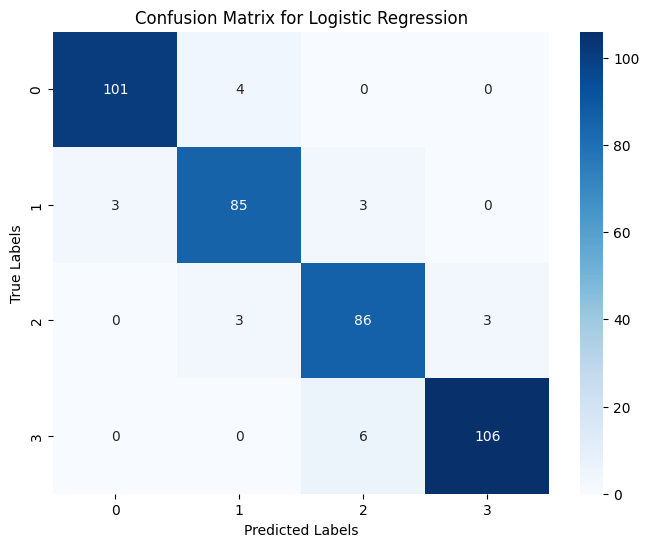

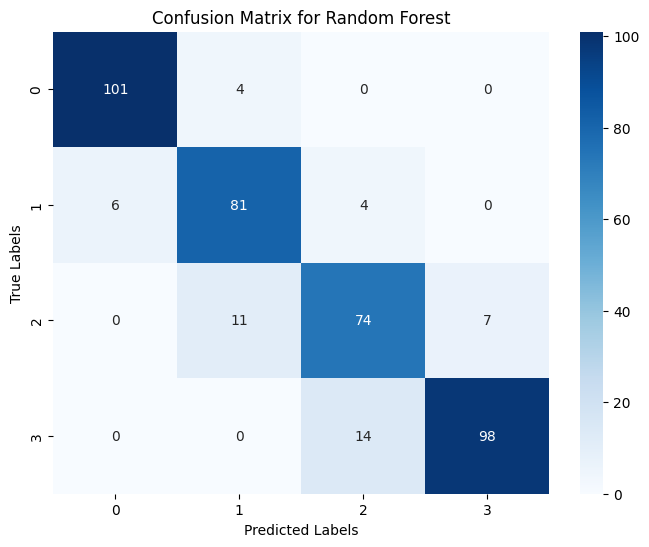

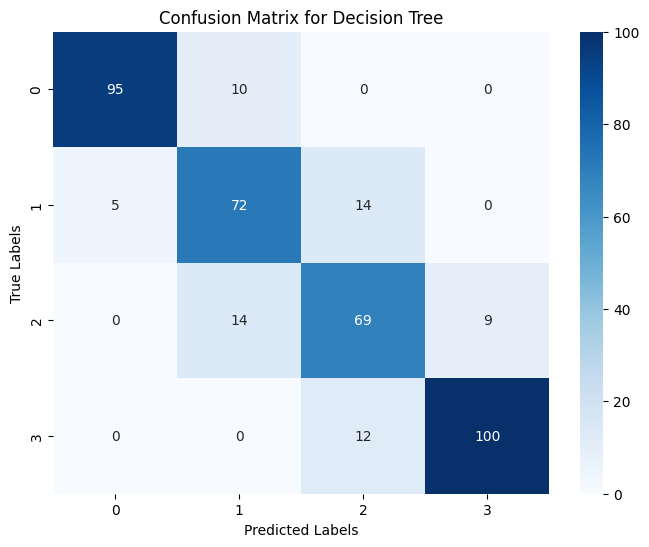

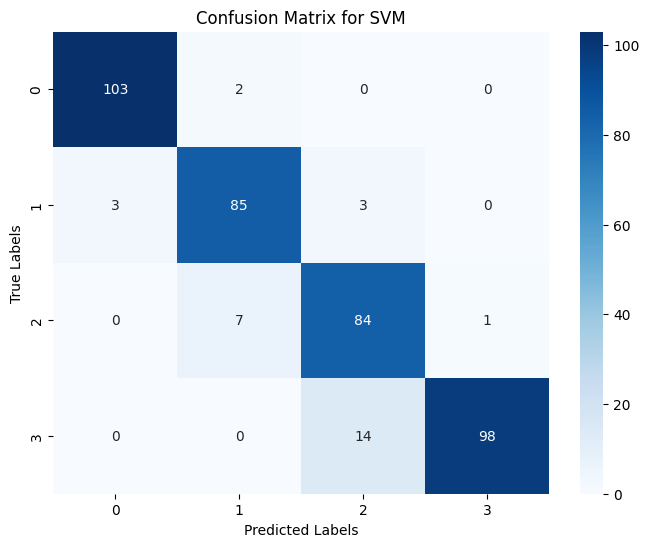

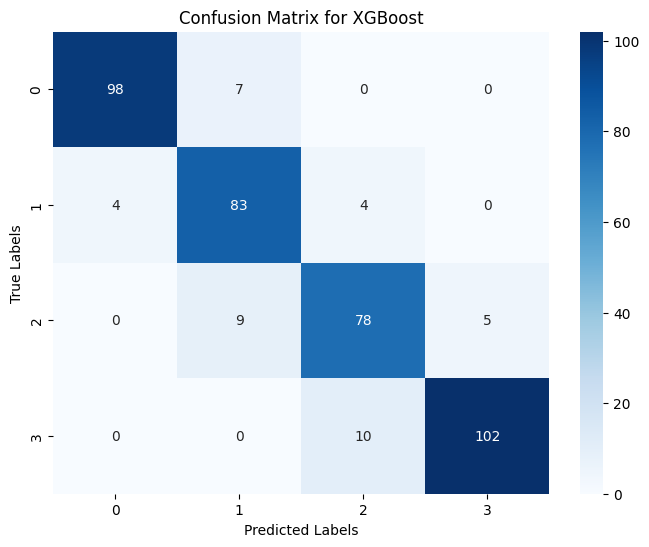

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Iterate over each row in the result_copy DataFrame
for idx, row in result_copy.iterrows():
    # Get the model name and predicted values (y_pred)
    model_name = row['Model']
    y_pred = row['y_pred']

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [ ]:
# Define parameter grid for Random Forest (example)
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

# Use GridSearchCV
pipeline.set_params(model=RandomForestClassifier())
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_price_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


In [ ]:
results_df_before

,Accuracy,Precision,Recall,F1-Score,Model
0,0.9450,0.945622,0.9450,0.945195,LogisticRegression
1,0.8825,0.884595,0.8825,0.882943,RandomForest
2,0.8400,0.843021,0.8400,0.840923,DecisionTree
3,0.9250,0.929248,0.9250,0.925636,SVM
4,0.9025,0.904854,0.9025,0.903136,XGBoost


In [333]:
results_df_after

,Accuracy,Precision,Recall,F1-Score,Model,Best Params
0,0.9425,0.943287,0.9425,0.942739,LogisticRegression,{'C': 10}
1,0.8975,0.899075,0.8975,0.897678,RandomForest,"{'max_depth': 20, 'n_estimators': 50}"
2,0.8400,0.844382,0.8400,0.841077,DecisionTree,"{'max_depth': 10, 'min_samples_split': 5}"
3,0.9350,0.936148,0.9350,0.935274,SVM,"{'C': 10, 'kernel': 'linear'}"
4,0.9025,0.904729,0.9025,0.903154,XGBoost,"{'learning_rate': 0.2, 'n_estimators': 100}"


##### FOR NEW DATA

In [ ]:
# Example of a new data point (replace values with actual data)
new_data = pd.DataFrame([{
    'battery_power': 1200,
    'blue': 1,
    'clock_speed': 2.0,
    'dual_sim': 1,
    'fc': 5,
    'four_g': 1,
    'int_memory': 64,
    'm_dep': 0.8,
    'mobile_wt': 150,
    'n_cores': 4,
    'pc': 12,
    'px_height': 800,
    'px_width': 1200,
    'ram': 2000,
    'sc_h': 15,
    'sc_w': 8,
    'talk_time': 10,
    'three_g': 1,
    'touch_screen': 1,
    'wifi': 1
}])
# Assuming Random Forest performed the best in training
pipeline.set_params(model=RandomForestClassifier(random_state=42))
pipeline.fit(X_train, y_train)  # Train pipeline with the selected model

# Predict the price range
predicted_price_range = pipeline.predict(new_data)

# Display the prediction
print(f"The predicted price range is: {predicted_price_range[0]}")
price_range_labels = {
    0: "Low price range",
    1: "Medium price range",
    2: "High price range",
    3: "Very high price range"
}

print(f"The phone belongs to: {price_range_labels[predicted_price_range[0]]}")


In [ ]:
new_data_batch = pd.DataFrame([
    # Example rows for multiple phones
    {'battery_power': 1200, 'blue': 1, 'clock_speed': 2.0, 'dual_sim': 1, 'fc': 5, 'four_g': 1, 'int_memory': 64, 'm_dep': 0.8, 'mobile_wt': 150, 'n_cores': 4, 'pc': 12, 'px_height': 800, 'px_width': 1200, 'ram': 2000, 'sc_h': 15, 'sc_w': 8, 'talk_time': 10, 'three_g': 1, 'touch_screen': 1, 'wifi': 1},
    {'battery_power': 800, 'blue': 0, 'clock_speed': 1.2, 'dual_sim': 0, 'fc': 2, 'four_g': 0, 'int_memory': 16, 'm_dep': 0.5, 'mobile_wt': 180, 'n_cores': 2, 'pc': 8, 'px_height': 600, 'px_width': 900, 'ram': 500, 'sc_h': 12, 'sc_w': 7, 'talk_time': 5, 'three_g': 1, 'touch_screen': 0, 'wifi': 1}
])

# Predict for all rows
predicted_price_ranges = pipeline.predict(new_data_batch)

# Attach predictions to the data
new_data_batch['predicted_price_range'] = predicted_price_ranges

print(new_data_batch)
